# Nuages de mots

## Imports et stopwords

In [3]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ilaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)

# Ajout de nouveaux stopwords
sw.update(["journal", "année", "article", "pages", "édition", "numéro", 'quelques', 'sit', 'max', 'celui', 'mod', 
           'leurs','conf', 'déjà','ecr','tel','tèl', 'mme','rue', 'prix', 'bon', 'part', 'très', 'ans', 'mois', 
           'heures', 'grand', 'grande', 'libre','tell', 'app', 'réf', 'adr', 'sal', 'frs', 'tél','soir', 'peu', 'chez'])

## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [106]:
# Choisir une année
year = 1949

In [107]:
print(os.getcwd())


/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/tps/tp2


In [108]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = "/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/data/txt"
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [109]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [110]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [111]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'DIMANCHE 21 AOUT 1949 - - LE SOIH HMMIIffll! DANS LE PAYS AISEAÜ Le clocher de l’église La restauration du clocher de l’église va faire l’objet d’une prochaine adjudication. On envisage un recouvremen'

In [112]:
# Ecrire tout le contenu dans un fichier temporaire
#'../../data/tmp' ou '/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/data/tmp'
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [113]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'DIMANCHE 21 AOUT 1949 - - LE SOIH HMMIIffll! DANS LE PAYS AISEAÜ Le clocher de l’église La restauration du clocher de l’église va faire l’objet d’une prochaine adjudication. On envisage un recouvrement en cuivre ou en ardoise.  ANVERS Le Congrès des instituteurs Le Congrès national organisé à Anvers les 22, 23, 24, 25 et 26 août par la Fédération générale des instituteurs belges, s’annonce comme un grand succès. Des centaines d’instituteurs et d’institutrices des différentes ré gions du pays, de'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [114]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [115]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1949_clean.txt!'

In [116]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'DIMANCHE AOUT SOIH HMMIIFFLL PAYS AISEAÜ CLOCHER ÉGLISE RESTAURATION CLOCHER ÉGLISE OBJET PROCHAINE ADJUDICATION ENVISAGE RECOUVREMENT CUIVRE ARDOISE ANVERS CONGRÈS INSTITUTEURS CONGRÈS NATIONAL ORGANISÉ ANVERS AOÛT FÉDÉRATION GÉNÉRALE INSTITUTEURS BELGES ANNONCE SUCCÈS CENTAINES INSTITUTEURS INSTITUTRICES DIFFÉRENTES GIONS PAYS DÉLÉGUÉS HOL LANDE ANGLETERRE DUCHÉ LUXEMBOURG ASSISTERONT TRAVAUX SAIT ORDRE JOUR COMPREND DIFFICULTÉS RENCONTRE ÉCOLE COMMUNALE TRAITEMENTS PENSIONS MUNDELEER MINISTRE'

## Nuage de mots

### Afficher les termes les plus fréquents


In [117]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BRUXELLES', 1276), ('ECRIRE', 617), ('BRUX', 547), ('MAISON', 544), ('PLACE', 484), ('PAYS', 421), ('LOUER', 414), ('BELGIQUE', 401), ('ÉTAT', 400), ('BELGE', 362)]


### Créer, stocker et afficher le nuage de mots

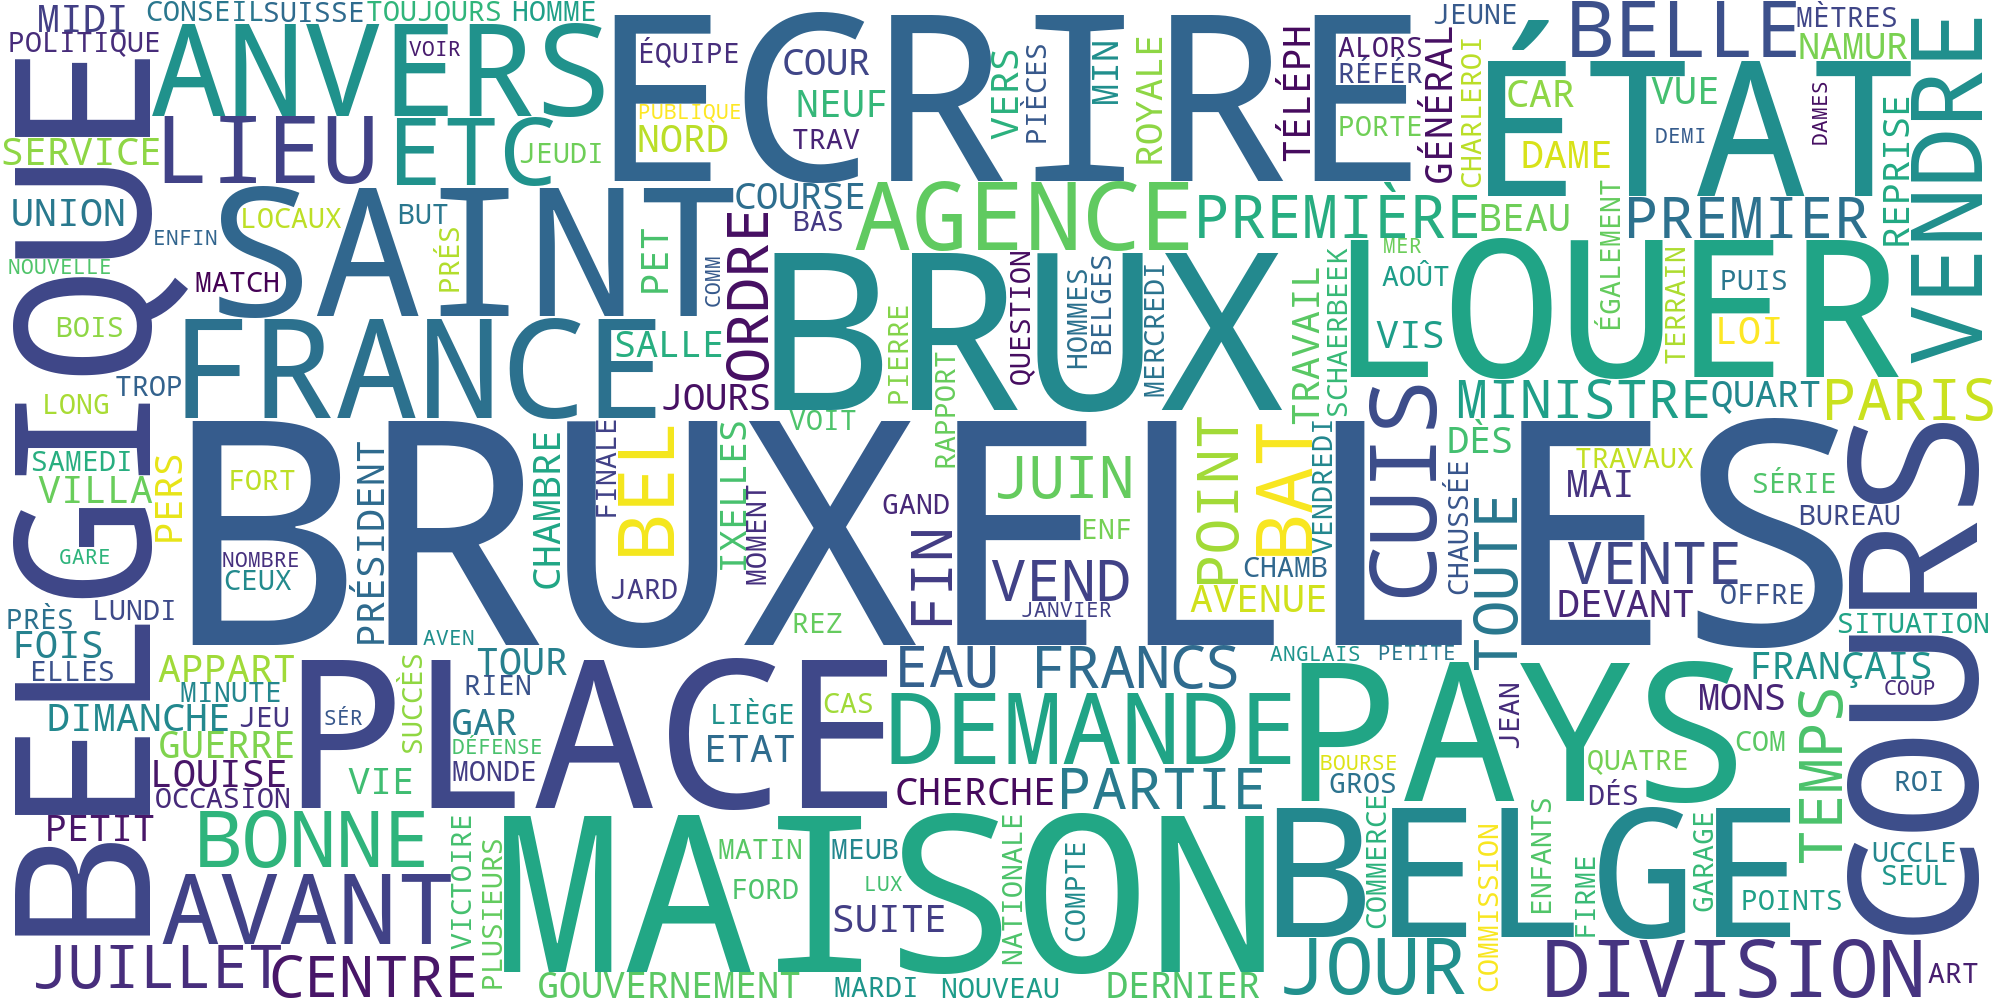

In [118]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))